<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/Classification_cc_imbalance_data_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What will we cover today ?


1.   Four models:

 *   Logistic Rregression (LR)
 *   Random Forest (RF)
 *   Support Vectror Classification (SVR)
 *   Boosting
 *   Naive Bayes


In [ ]:
import numpy as np
import pandas as pd
# Models (Sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data and Evaluation packages
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
# visualization
import plotly.express as px

[Data description](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [ ]:
#file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# from sklearn.datasets import load_breast_cancer
# df = load_breast_cancer(as_frame=True)
# print(df.data.shape)
df = raw_df

In [ ]:
X, y = df[df.columns[:-1]], df[df.columns[-1]]
X.shape, y.shape

((284807, 30), (284807,))

## Unique y values (i.e the labels)

# Class distribution

In [ ]:
len(df[df.Class == 1])/len(df), len(df[df.Class == 0])/len(df)

(0.001727485630620034, 0.9982725143693799)

In [ ]:
set(y)

{0, 1}

## Are the feature values scaled/normalized ?

In [ ]:
# X.min(), X.max()

## Lets normalize the features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X)
#df_preprocessed = pd.DataFrame(df_all_numeric_scaled, columns=df.columns)

In [ ]:
X_scaled.min(), X_scaled.max()

(0.0, 1.0)

In [ ]:
X = X_scaled

## (50-50) % Train-Test splits

In [ ]:
# 50-50% split
train_test_split_point = len(X) // 2
# Split the data into training/testing sets
X_train = X[:train_test_split_point]
X_test = X[train_test_split_point:]
# Split the targets into training/testing sets
y_train = y[:train_test_split_point]
y_test = y[train_test_split_point:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142403, 30), (142404, 30), (142403,), (142404,))

## Training and Testing a LR model

In [ ]:
# Create linear regression object
# regr = LinearRegression()
clf = LogisticRegression()
# Train the model using the training sets
clf.fit(X_train, y_train)

LogisticRegression()

Regression model parameters

In [ ]:
# Make predictions using the testing set
y_pred = clf.predict(X_test)
# The mean squared error
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))

accuracy: 1.00


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

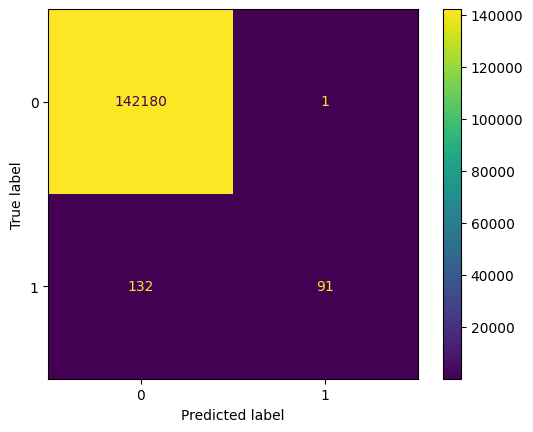

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

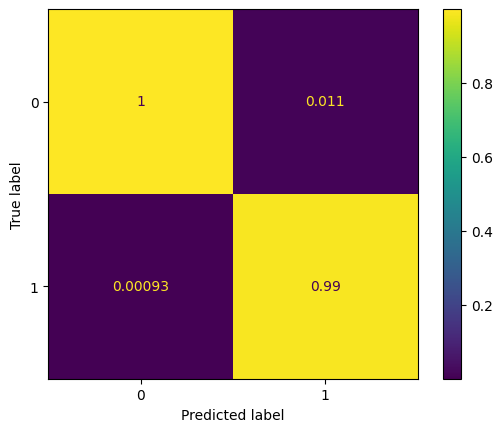

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm/cm.sum(axis=0),
                              display_labels=clf.classes_)
disp.plot()
plt.show()

## Random splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((227845, 30), (227845,), (56962, 30), (56962,))

## Our Wrapper Class (Can take any model as an input)

In [ ]:
from sklearn.model_selection import cross_val_score

class myClassificationModel:
  def __init__(self, model):
    self.model = model
    self.nb_cv_splits = 3
    self.evaluation_metrics = 'accuracy' #'f1'

  def train(self, X, y):
    self.model.fit(X, y)

  def evaluate(self, X, y):
    y_predict = self.model.predict(X)
    # return mean_squared_error(y, y_predict)
    return accuracy_score(y, y_predict)

  def cv_error(self, X, y):
    return cross_val_score(self.model,
                           X,
                           y, scoring=self.evaluation_metrics,
                           cv=self.nb_cv_splits)



## Logistic Regression (LR)

In [ ]:
my_model = myClassificationModel(LogisticRegression())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9990563760451184
test-error 0.9990519995786665


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.99915733 0.99896773 0.99873598]
cross validation score (mean): 0.9989536766382168
cross validation score (std): 0.00017230194952908424


## Random Forest (RF)

In [ ]:
my_model = myClassificationModel(RandomForestClassifier())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 1.0
test-error 0.9994908886626171


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

KeyboardInterrupt: 

## Support Vector Classifier (SVC)

In [ ]:
my_model = myClassificationModel(SVC())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

## Boosting

In [ ]:
my_model = myClassificationModel(GradientBoostingClassifier())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

## Naive Bayes

In [ ]:
my_model = myClassificationModel(GaussianNB())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))